# Programming Assignment 5 - Build your own Conventional Neural Network

After completing this project, you will be able to do the following:

- Build neural network conveniently.
- Configure with different regularization methods: Dropout, l1 or l2 regulation.

- **574 Only**: Fine tune pre-trained model to build your own projects.

# Dataset

This dataset is provided by our current research project, which utilize 20 kHz acoustic sensing to sense ASL gestures. All the 10 ASL words perform by 5 subjects. All images are generated by using the short-time Fourier transform (STFT) to calculate a spectrogram as the feature representation of the reflected near-ultrasound waves. Based on the Doppler effect, sign language gestures, including both hands and arms, will cause phase and frequency changes of the reflected sonic wave. The spectrogram contains information in both frequency and time domains. The spectrogram is also defined as the Power Spectral Density of the function:
\begin{equation}
    \textrm{spectrogram}\{x(t)\}(\tau,\omega)\equiv |X(\tau,\omega)|^{2}= \left| \sum^{\infty}_{n=-\infty}x[n]\omega[n-m]e^{-j\omega n}\right|^{2}
\end{equation}
where $x[n]$ is input signal, and $\omega[n-m]$ represents the overlapping Kaiser window function with an adjustable shape factor $\beta$ that improves the resolution and reduces the spectral leakage close to the sidelobes of the signal. The coefficients of the Kaiser window are computed as:
\begin{equation}
    \omega[n]=\frac{I_{0}\left(\beta\sqrt{1-\left(\frac{n-N/2}{N/2}\right)^{2}}\right)}{I_{0}(\beta)}, 0 \leq n \leq N
\end{equation}

This dataset has a training set of 5,000 examples, and a test set of 1,000 examples.

# Submission

1. **Coding checks (60 points)** - The code for your implementation should be in Python only. The name of the Main file should be main.ipynb or main.py. Please provide necessary comments in the code.

2. **Written Report (40 points)**: The report should be delivered as a separate pdf file, and it is recommended for you to use the NIPS template to structure your report. You may include comments in the Jupyter Notebook, however you will need to duplicate the results in the report. The report should describe your results, experimental setup and comparison between the results obtained
from different setting of the algorithm and dataset.**Again, the questions in the Assignment PDF and here are the same (for the written report), we just put them in both places for convenience.**


As such, you will submit, one member of your group will subit as a zip file on UBLearns, a ```.zip``` file that contains 3 things:
- Your completed jupyter notebook.
- Your written report.

In [9]:
pip install pillow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 9.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [20]:
import numpy as np
## please add the essential libraries

# YOUR CODE HERE
import tensorflow.keras as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow.keras.layers as ls 
import tensorflow.keras as ks
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
#from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPooling2D

## Part 1. loading dataset

We have splitted the dataset into training, validation and test. You can load every single folder to load dataset using keras ImageDataGenerator (10 points).

In [5]:
# load the file from our dataset including training, validation and testing part
img_width, img_height = 224, 224
train_data_dir      = 'pictures/train'
validation_data_dir = 'pictures/val'
test_data_dir       = 'pictures/test'

epochs = 50
batch_size = 16

# # this is a generator that will read pictures found in
# # subfolers of 'data/train', and indefinitely generate
# # batches of augmented image data
datagen = ImageDataGenerator(rescale=1./255)

# Your Code HERE
train_generator = datagen.flow_from_directory(train_data_dir, target_size = (img_width,img_height))
valid_generator = datagen.flow_from_directory(validation_data_dir, target_size = (img_width,img_height))
test_generator  = datagen.flow_from_directory(test_data_dir, target_size = (img_width,img_height))


# please print the number of samples in each folder 
# Your Code HERE
print("Number of samples in Train Folder: ", train_generator.samples)
print("Number of samples in Valid Folder: ",valid_generator.samples)
print("Number of samples in Test Folder: ",test_generator.samples)

Found 4176 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Found 1392 images belonging to 10 classes.
Number of samples in Train Folder:  4176
Number of samples in Valid Folder:  1392
Number of samples in Test Folder:  1392


## Part 2.1 - Build your Neural Network and Train

Build a Convolutional Neural Network with 2 or 3 hidden layers without regularization methods, which includes Conv2D layer, activation Layer. please use training dataset and validation dataset for training processs, and plot the training process with Loss trend and accuracy trend (30 Points).

## Part 2.2 - Test 

Test your machine learning model on the testing set: After finishing all the above steps, fix your hyper-parameters(learning rate, number of neurons per layer) and model parameter and test your model’s performance on the testing set. This shows the effectiveness of your model’s generalization power gained by learning. For test dataset, the performance should be more than 80% (10 Points).

In [6]:
# build conv2D CNN model, be careful with softmax and output layers is 10

# define the input shape of Convolutional Neural Network
# Your Code HERE
#input_shape = (224,224,3)


# define the Convolutional Neural Network
model = Sequential()
# Your Code HERE
# 1st Convolutional Layer
model.add(ls.Conv2D(filters=96, input_shape=(224,224,3), strides=(4,4),kernel_size=(11,11), activation ='relu',padding='same'))
# Max Pooling 
model.add(ls.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model.add(ls.BatchNormalization())
# 2nd Convolutional Layer
model.add(ls.Conv2D(filters=256, strides=(2,2), kernel_size=(11,11), padding='same',activation ='relu'))
# Max Pooling
model.add(ls.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model.add(ls.BatchNormalization())
# 3rd Convolutional Layer
model.add(ls.Conv2D(filters=384,  strides=(1,1),kernel_size=(3,3), padding='valid',activation ='relu'))
# # Batch Normalisation
model.add(ls.BatchNormalization())
# 4th Convolutional Layer
model.add(ls.Conv2D(filters=384,  strides=(2,2), kernel_size=(3,3), padding='same',activation ='relu'))
# Batch Normalisation
model.add(ls.BatchNormalization())
# 5th Convolutional Layer
model.add(ls.Conv2D(filters=256, strides=(2,2), kernel_size=(3,3), padding='valid',activation ='relu'))
# Max Pooling
model.add(ls.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model.add(ls.BatchNormalization())
# Passing it to a dense layer
model.add(ls.Flatten())
# 1st Dense Layer
model.add(ls.Dense(4096, input_shape=(224*224*3,),activation ='relu'))
# Add Dropout to prevent overfitting
model.add(ls.Dropout(0.4))
# Batch Normalisation
model.add(ls.BatchNormalization())
# 2nd Dense Layer
model.add(ls.Dense(4096,activation ='relu'))
# Add Dropout
model.add(ls.Dropout(0.6))
# Batch Normalisation
model.add(ls.BatchNormalization())
# 3rd Dense Layer
model.add(ls.Dense(1000,activation ='relu'))
# Add Dropout
model.add(ls.Dropout(0.5))
# Batch Normalisation
model.add(ls.BatchNormalization())
model.add(ls.Flatten())
# Output Layer
model.add(ls.Dense(10,activation ='softmax'))
model.summary()


Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



2022-05-14 18:43:31.547382: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-05-14 18:43:31.548938: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 28, 28, 96)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 28, 28, 96)       384       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 256)       2973952   
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 256)        0         
 2D)                                                             
                                                        

In [7]:
# Compiling the model and training including the files of compile and fit
model.compile(loss ='categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])

In [8]:
#Train the model with training and validation set
model.fit(train_generator, epochs=50, batch_size = batch_size, validation_data = valid_generator)

Epoch 1/50


2022-05-14 18:43:42.504189: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz
2022-05-14 18:43:43.035055: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - ETA: 0s - loss: 1.2362 - accuracy: 0.6602

2022-05-14 18:44:25.630312: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - 45s 289ms/step - loss: 1.2362 - accuracy: 0.6602 - val_loss: 1.6382 - val_accuracy: 0.4404
Epoch 2/50
131/131 [==============================] - 35s 265ms/step - loss: 0.2780 - accuracy: 0.9159 - val_loss: 3.3591 - val_accuracy: 0.3930
Epoch 3/50
131/131 [==============================] - 35s 265ms/step - loss: 0.1526 - accuracy: 0.9509 - val_loss: 0.7720 - val_accuracy: 0.8743
Epoch 4/50
131/131 [==============================] - 35s 268ms/step - loss: 0.1337 - accuracy: 0.9605 - val_loss: 1.2970 - val_accuracy: 0.7708
Epoch 5/50
131/131 [==============================] - 36s 272ms/step - loss: 0.1247 - accuracy: 0.9643 - val_loss: 1.0951 - val_accuracy: 0.7938
Epoch 6/50
131/131 [==============================] - 37s 282ms/step - loss: 0.0879 - accuracy: 0.9720 - val_loss: 0.5256 - val_accuracy: 0.8980
Epoch 7/50
131/131 [==============================] - 36s 277ms/step - loss: 0.0688 - accuracy: 0.9749 - val_loss: 0.3630 - val_accuracy: 0.9

%Test

In [9]:
# Test the model on a testing dataset
pred = model.predict(test_generator, batch_size = batch_size)

2022-05-14 19:36:01.165774: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [10]:
score = model.evaluate(test_generator)

44/44 [==============================] - 3s 58ms/step - loss: 0.3193 - accuracy: 0.9203


## Part 2.3 - L1 Regularization. Please add L1 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [15]:
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D
# define the input shape of Convolutional Neural Network
# Your Code HERE
from tensorflow.keras import regularizers
# define the Convolutional Neural Network
model_l1 = Sequential()
lambda_val = 0.01
# Your Code HERE
# 1st Convolutional Layer
model_l1.add(ls.Conv2D(filters=96, input_shape=(224,224,3), strides=(4,4),kernel_size=(11,11), activation ='relu',padding='same',kernel_regularizer = regularizers.l1(lambda_val)))
# Max Pooling 
model_l1.add(ls.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model_l1.add(ls.BatchNormalization())
# 2nd Convolutional Layer
model_l1.add(ls.Conv2D(filters=256, strides=(2,2), kernel_size=(11,11), padding='same',activation ='relu',kernel_regularizer = regularizers.l1(lambda_val)))
# Max Pooling
model_l1.add(ls.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model_l1.add(ls.BatchNormalization())
# 3rd Convolutional Layer
model_l1.add(ls.Conv2D(filters=384,  strides=(1,1),kernel_size=(3,3), padding='valid',activation ='relu',kernel_regularizer = regularizers.l1(lambda_val)))
# # Batch Normalisation
model_l1.add(ls.BatchNormalization())
# 4th Convolutional Layer
model_l1.add(ls.Conv2D(filters=384,  strides=(2,2), kernel_size=(3,3), padding='same',activation ='relu',kernel_regularizer = regularizers.l1(lambda_val)))
# Batch Normalisation
model_l1.add(ls.BatchNormalization())
# 5th Convolutional Layer
model_l1.add(ls.Conv2D(filters=256, strides=(2,2), kernel_size=(3,3), padding='valid',activation ='relu',kernel_regularizer = regularizers.l1(lambda_val)))
# Max Pooling
model_l1.add(ls.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model_l1.add(ls.BatchNormalization())
# Passing it to a dense layer
model_l1.add(ls.Flatten())
# 1st Dense Layer
model_l1.add(ls.Dense(4096, input_shape=(224*224*3,),activation ='relu'))
# Add Dropout to prevent overfitting
model_l1.add(ls.Dropout(0.4))
# Batch Normalisation
model_l1.add(ls.BatchNormalization())
# 2nd Dense Layer
model_l1.add(ls.Dense(4096,activation ='relu'))
# Add Dropout
model_l1.add(ls.Dropout(0.6))
# Batch Normalisation
model_l1.add(ls.BatchNormalization())
# 3rd Dense Layer
model_l1.add(ls.Dense(1000,activation ='relu'))
# Add Dropout
model_l1.add(ls.Dropout(0.5))
# Batch Normalisation
model_l1.add(ls.BatchNormalization())
model_l1.add(ls.Flatten())
# Output Layer
model_l1.add(ls.Dense(10,activation ='softmax'))
model_l1.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 28, 28, 96)       0         
 2D)                                                             
                                                                 
 batch_normalization_16 (Bat  (None, 28, 28, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 14, 14, 256)       2973952   
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 7, 7, 256)        0         
 2D)                                                             
                                                      

In [16]:
# Compiling the model and training including the files of compile and fit
model_l1.compile(loss ='categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
#Train the model with training and validation set
history_l1 = model_l1.fit(train_generator, epochs=50, batch_size = batch_size, validation_data = valid_generator)


Epoch 1/50


2022-05-14 19:45:50.176289: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - ETA: 0s - loss: 154.3866 - accuracy: 0.4959

2022-05-14 19:46:26.537019: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - 40s 288ms/step - loss: 154.3866 - accuracy: 0.4959 - val_loss: 33.3139 - val_accuracy: 0.0862
Epoch 2/50
131/131 [==============================] - 36s 277ms/step - loss: 26.2937 - accuracy: 0.5129 - val_loss: 27.2382 - val_accuracy: 0.0862
Epoch 3/50
131/131 [==============================] - 37s 284ms/step - loss: 22.8621 - accuracy: 0.6027 - val_loss: 26.4691 - val_accuracy: 0.0862
Epoch 4/50
131/131 [==============================] - 37s 283ms/step - loss: 21.3475 - accuracy: 0.6535 - val_loss: 39.6579 - val_accuracy: 0.0862
Epoch 5/50
131/131 [==============================] - 38s 292ms/step - loss: 19.1227 - accuracy: 0.7155 - val_loss: 28.8544 - val_accuracy: 0.0862
Epoch 6/50
131/131 [==============================] - 38s 292ms/step - loss: 17.9901 - accuracy: 0.7651 - val_loss: 23.8851 - val_accuracy: 0.1121
Epoch 7/50
131/131 [==============================] - 38s 292ms/step - loss: 18.1365 - accuracy: 0.7893 - val_loss: 20.8987 - va

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


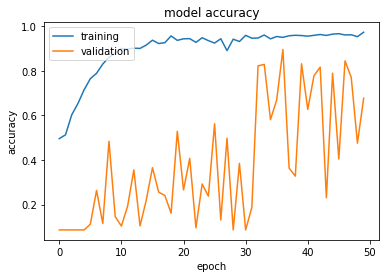

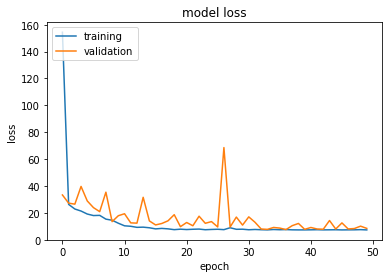

In [31]:
# list all data in history
print(history_l1.history.keys())
# summarize history for accuracy
plt.plot(history_l1.history['accuracy'])
plt.plot(history_l1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()
plt.plot(history_l1.history['loss'])
plt.plot(history_l1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training', 'validation'], loc='upper left')
plt.show()

In [99]:
#with lambda =1 ,accuracy = accuracy: 0.6480 only 1 layer
#with lambda =0.1 ,accuracy = accuracy: 0.3865 only 1 layer

In [22]:
pred_l1 = model_l1.predict(test_generator, batch_size = batch_size)
score_l1 = model_l1.evaluate(test_generator)

2022-05-14 20:33:53.475886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 3s 58ms/step - loss: 8.5396 - accuracy: 0.6430


## Part 2.4 - L2 Regularization. Please add L2 regularization setting in your Conv2D layer. Then, train your new model separately, and plot the training process including loss and accuracy. (10 points)

In [24]:
# please redefine your model with setting the L1 Regularization in the layer of Conv 2D
# define the input shape of Convolutional Neural Network
# Your Code HERE
from tensorflow.keras import regularizers
# define the Convolutional Neural Network
model_l2 = Sequential()
lambda_val = 0.01
# Your Code HERE
# 1st Convolutional Layer
model_l2.add(ls.Conv2D(filters=96, input_shape=(224,224,3), strides=(4,4),kernel_size=(11,11), activation ='relu',padding='same',kernel_regularizer = regularizers.l2(lambda_val)))
# Max Pooling 
model_l2.add(ls.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation before passing it to the next layer
model_l2.add(ls.BatchNormalization())
# 2nd Convolutional Layer
model_l2.add(ls.Conv2D(filters=256, strides=(2,2), kernel_size=(11,11), padding='same',activation ='relu',kernel_regularizer = regularizers.l2(lambda_val)))
# Max Pooling
model_l2.add(ls.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
# Batch Normalisation
model_l2.add(ls.BatchNormalization())
# 3rd Convolutional Layer
model_l2.add(ls.Conv2D(filters=384,  strides=(1,1),kernel_size=(3,3), padding='valid',activation ='relu',kernel_regularizer = regularizers.l2(lambda_val)))
# # Batch Normalisation
model_l2.add(ls.BatchNormalization())
# 4th Convolutional Layer
model_l2.add(ls.Conv2D(filters=384,  strides=(2,2), kernel_size=(3,3), padding='same',activation ='relu',kernel_regularizer = regularizers.l2(lambda_val)))
# Batch Normalisation
model_l2.add(ls.BatchNormalization())
# 5th Convolutional Layer
model_l2.add(ls.Conv2D(filters=256, strides=(2,2), kernel_size=(3,3), padding='valid',activation ='relu',kernel_regularizer = regularizers.l2(lambda_val)))
# Max Pooling
model_l2.add(ls.MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='same'))
# Batch Normalisation
model_l2.add(ls.BatchNormalization())
# Passing it to a dense layer
model_l2.add(ls.Flatten())
# 1st Dense Layer
model_l2.add(ls.Dense(4096, input_shape=(224*224*3,),activation ='relu'))
# Add Dropout to prevent overfitting
model_l2.add(ls.Dropout(0.4))
# Batch Normalisation
model_l2.add(ls.BatchNormalization())
# 2nd Dense Layer
model_l2.add(ls.Dense(4096,activation ='relu'))
# Add Dropout
model_l2.add(ls.Dropout(0.6))
# Batch Normalisation
model_l2.add(ls.BatchNormalization())
# 3rd Dense Layer
model_l2.add(ls.Dense(1000,activation ='relu'))
# Add Dropout
model_l2.add(ls.Dropout(0.5))
# Batch Normalisation
model_l2.add(ls.BatchNormalization())
model_l2.add(ls.Flatten())
# Output Layer
model_l2.add(ls.Dense(10,activation ='softmax'))
model_l2.summary()


Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 56, 56, 96)        34944     
                                                                 
 max_pooling2d_12 (MaxPoolin  (None, 28, 28, 96)       0         
 g2D)                                                            
                                                                 
 batch_normalization_32 (Bat  (None, 28, 28, 96)       384       
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 14, 14, 256)       2973952   
                                                                 
 max_pooling2d_13 (MaxPoolin  (None, 7, 7, 256)        0         
 g2D)                                                            
                                                      

In [25]:
# Compiling the model and training including the files of compile and fit
model_l2.compile(loss ='categorical_crossentropy', optimizer='adam' ,metrics =['accuracy'])
#Train the model with training and validation set
history_l2 = model_l2.fit(train_generator, epochs=50, batch_size = batch_size, validation_data = valid_generator)

Epoch 1/50


2022-05-14 20:37:13.334688: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - ETA: 0s - loss: 11.8456 - accuracy: 0.6703

2022-05-14 20:37:50.835206: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - 41s 297ms/step - loss: 11.8456 - accuracy: 0.6703 - val_loss: 11.1815 - val_accuracy: 0.2270
Epoch 2/50
131/131 [==============================] - 38s 287ms/step - loss: 5.8322 - accuracy: 0.8851 - val_loss: 6.2095 - val_accuracy: 0.4842
Epoch 3/50
131/131 [==============================] - 38s 291ms/step - loss: 3.0872 - accuracy: 0.8980 - val_loss: 3.7289 - val_accuracy: 0.5345
Epoch 4/50
131/131 [==============================] - 38s 290ms/step - loss: 1.9389 - accuracy: 0.9068 - val_loss: 2.6299 - val_accuracy: 0.7119
Epoch 5/50
131/131 [==============================] - 40s 308ms/step - loss: 1.4140 - accuracy: 0.9291 - val_loss: 1.8378 - val_accuracy: 0.7974
Epoch 6/50
131/131 [==============================] - 41s 309ms/step - loss: 1.4253 - accuracy: 0.9171 - val_loss: 4.6916 - val_accuracy: 0.4533
Epoch 7/50
131/131 [==============================] - 41s 317ms/step - loss: 1.3442 - accuracy: 0.9229 - val_loss: 2.9509 - val_accuracy: 0

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


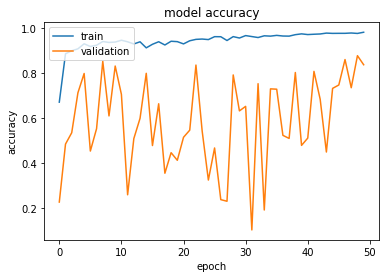

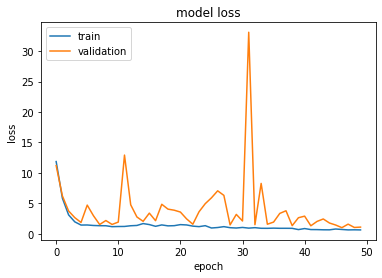

In [32]:
# list all data in history
print(history_l2.history.keys())
# summarize history for accuracy
plt.plot(history_l2.history['accuracy'])
plt.plot(history_l2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history_l2.history['loss'])
plt.plot(history_l2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [27]:
pred_l2 = model_l2.predict(test_generator, batch_size = batch_size)
score_l2 = model_l2.evaluate(test_generator)

2022-05-14 21:49:00.744544: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 3s 57ms/step - loss: 1.1450 - accuracy: 0.8218


## Part3 - ** only for 574 students **.
1. Fine tune the well pre-trained model, Resnet 50, with different freeze layers. 
First,  load pre-trained resnet 50 from library.
Second, Fine-tune the model to fit our project, 10-classes.
Third,  freeze different layers, plot different training process with different frozen layers (at least three different layers).

In [28]:
# load pre-trained resnet 50 from libarary
# your Code HERE
#%tensorflow_version 1.x
from keras.models import Sequential, Model,load_model
import tensorflow.keras as K
input_t=K.Input(shape=(224, 224, 3))
model_res =K.applications.ResNet50(weights="imagenet", input_tensor=input_t)
# Fine-tune the model to fit our project  
# your Code HERE
headModel = model_res.output
headModel1 = ls.Dense(10, activation="softmax")(headModel)
model_o = Model(inputs=model_res.input, outputs=headModel1)

# define the freeze layers 
# your Code HERE
#freezing layers
for layer in model_o.layers[:70]:
  layer.trainable=False

# Please compile the new model
#model.compile()
model_o.compile(loss='categorical_crossentropy', optimizer=K.optimizers.RMSprop(lr=2e-5), metrics=['accuracy'])

#Train the model with training and validation set
#model.fit()
history_res=model_o.fit(train_generator, batch_size=32, epochs=50, verbose=1, validation_data=valid_generator)

Epoch 1/50


/Users/manish.addanki/miniforge3/lib/python3.9/site-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)
2022-05-14 21:50:30.716886: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - ETA: 0s - loss: 2.2604 - accuracy: 0.5012

2022-05-14 21:52:12.739800: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


131/131 [==============================] - 119s 820ms/step - loss: 2.2604 - accuracy: 0.5012 - val_loss: 2.3030 - val_accuracy: 0.1034
Epoch 2/50
131/131 [==============================] - 106s 809ms/step - loss: 2.2366 - accuracy: 0.7244 - val_loss: 2.2740 - val_accuracy: 0.4878
Epoch 3/50
131/131 [==============================] - 109s 835ms/step - loss: 2.2292 - accuracy: 0.8690 - val_loss: 2.2327 - val_accuracy: 0.8175
Epoch 4/50
131/131 [==============================] - 111s 849ms/step - loss: 2.2230 - accuracy: 0.9001 - val_loss: 2.2246 - val_accuracy: 0.8714
Epoch 5/50
131/131 [==============================] - 118s 903ms/step - loss: 2.2186 - accuracy: 0.9068 - val_loss: 2.2195 - val_accuracy: 0.8865
Epoch 6/50
131/131 [==============================] - 130s 992ms/step - loss: 2.2141 - accuracy: 0.9080 - val_loss: 2.2147 - val_accuracy: 0.8894
Epoch 7/50
131/131 [==============================] - 131s 999ms/step - loss: 2.2097 - accuracy: 0.9104 - val_loss: 2.2096 - val_accura

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


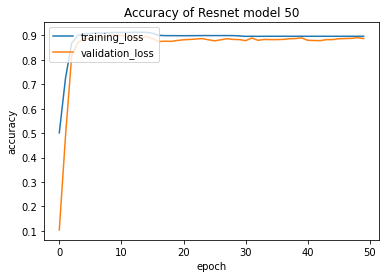

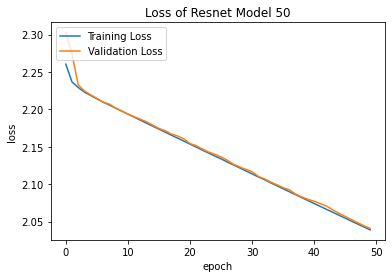

In [29]:
print(history_res.history.keys())
# summarize history for accuracy
plt.plot(history_res.history['accuracy'])
plt.plot(history_res.history['val_accuracy'])
plt.title('Accuracy of Resnet model 50')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['training_loss', 'validation_loss'], loc='upper left')
plt.show()

plt.plot(history_res.history['loss'])
plt.plot(history_res.history['val_loss'])
plt.title('Loss of Resnet Model 50')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['Training Loss', 'Validation Loss'], loc='upper left')
plt.show()

In [33]:
pred_res = model_o.predict(test_generator, batch_size = batch_size)
score_res = model_o.evaluate(test_generator)

2022-05-15 00:30:46.317600: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


44/44 [==============================] - 15s 333ms/step - loss: 2.0430 - accuracy: 0.8764
